In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('train_V2.csv')

In [4]:
test = pd.read_csv('test_V2.csv')

In [5]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
train.shape

(4446966, 29)

In [7]:
test.shape

(1934174, 28)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [9]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [11]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


### Missing values in Train

In [12]:
train[train['winPlacePerc'].isnull() == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [13]:
train.drop(train.index[[2744604]],inplace = True)

### EDA

In [79]:
#train = train[:200000]

In [36]:
#### 1.1. damagedealt

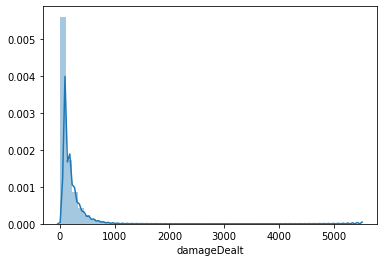

In [37]:
sns.distplot(train['damageDealt'])

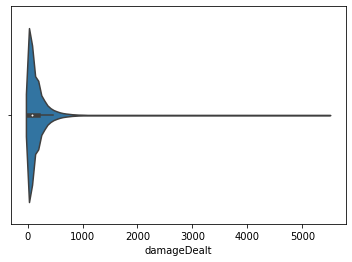

In [38]:
sns.violinplot(train['damageDealt'])

In [39]:
train['damageDealt'].describe()

count    200000.000000
mean        130.764752
std         171.826055
min           0.000000
25%           0.000000
50%          84.000000
75%         185.500000
max        5479.000000
Name: damageDealt, dtype: float64

In [14]:
for i in range(0,10):
    a = str(0.9) + str(i)
    print(a, train['damageDealt'].quantile(float(a)))

0.90 333.7
0.91 352.9
0.92 374.2
0.93 397.9
0.94 425.0
0.95 459.1
0.96 500.6
0.97 556.2
0.98 635.3
0.99 776.2


In [20]:
train[train['damageDealt'] > 776.2]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.0,6,2,2,2,...,0,4860.0,0,0.0,0,0,2727.0,7,1603,0.9592
186,eb7a3e9f50eca5,fe3d74f737cd10,92338c2233be1a,0,5,778.0,0,3,2,2,...,0,0.0,0,0.0,0,0,2422.0,5,1506,1.0000
220,259b60cf936fbe,4f2c47b318d9c5,086900c21b1640,2,2,902.5,4,2,2,8,...,1,844.0,0,0.0,0,0,3305.0,6,0,0.9630
262,ad96536291127f,3d754e81169f15,2a562f2829e412,3,3,1101.0,10,0,9,2,...,2,0.0,0,0.0,0,0,3157.0,6,0,0.9231
300,9ac54e66c0a5d3,d973f082d6c416,15535f0f9d9e46,1,7,1120.0,8,3,1,1,...,0,0.0,0,0.0,0,0,3503.0,8,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446348,687d0c85d04e2c,784f69686ac069,f30806786088e7,0,4,809.4,6,5,4,1,...,2,3451.0,0,0.0,0,0,1569.0,5,1636,0.7500
4446351,524d52abffa7b8,a199ea12de31c3,b17b7152fef746,0,1,827.1,5,0,0,4,...,0,3235.0,0,0.0,0,0,2111.0,6,0,0.8519
4446353,455b0ab51addcf,1e83e7cc091df5,8fac94db3260a0,1,4,1300.0,0,5,5,2,...,0,0.0,0,0.0,0,0,186.3,13,0,1.0000
4446561,0b25a77bc61924,1e50f263298b00,ac7101ad78466d,0,2,1318.0,10,6,1,1,...,1,0.0,0,0.0,0,0,4795.0,3,0,1.0000


In [39]:
train[ (train['damageDealt'] > 776.2) & (train['kills'] < 1)]


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
47241,d66b1f32585f7a,ec57b7fc28644f,ea5ba780c3861d,0,0,1051.0,0,0,0,7,...,0,0.0,0,0.000,0,0,0.0,3,0,0.0000
349810,ddd13f316fe777,ecd20620cda071,ec9a90395ed8c0,0,0,886.6,0,0,0,5,...,0,0.0,0,0.000,0,0,216.3,4,0,0.0000
357222,5cc54a24eb6b92,4e0a67275c6954,42f14b3483d7b2,0,0,1115.0,0,0,0,2,...,0,0.0,0,0.000,0,0,0.0,2,0,1.0000
362420,5d36af4dfda97f,94a19d5ae89bdf,489be5d26529ae,0,2,969.9,9,0,0,47,...,0,5151.0,0,0.000,1,0,1228.0,2,1499,0.7308
371738,61ee321b3e3923,d2789c16b9ce99,6ce78034d8f100,0,0,917.1,0,0,0,15,...,0,0.0,0,0.000,0,0,0.0,4,0,0.0000
427765,4519dcbe90184b,b4d53c320cc58f,01435d33376fd0,0,0,956.5,0,0,0,11,...,0,0.0,0,0.000,0,0,0.0,1,0,0.0000
457423,641f7d4243b3c9,0470b782aed4ad,2786062700ee33,0,0,1531.0,0,0,1,13,...,0,0.0,0,0.000,0,0,0.0,3,0,0.0000
503187,7f950a2ee70b9a,267aa7314a2b9e,a5a5aaacfb89f6,0,0,795.7,0,0,0,5,...,0,0.0,0,0.000,0,0,0.0,7,0,1.0000
526837,1d67a66fea9f67,e1bb59564cae8f,a1df8b982127be,0,0,1495.0,0,0,0,10,...,0,0.0,0,0.000,0,0,0.0,4,0,0.0000
673504,6dfdb637676bda,a6a24083d126a5,87b1d56b58fd46,0,0,961.0,0,0,0,4,...,0,1235.0,0,0.000,0,0,906.1,1,0,0.0000


In [40]:
a1 = train[ (train['damageDealt'] > 776.2) & (train['kills'] < 1)].index

In [41]:
a1

Int64Index([  47241,  349810,  357222,  362420,  371738,  427765,  457423,
             503187,  526837,  673504,  712091,  751864,  864281, 1000651,
            1030717, 1061020, 1105726, 1192243, 1225427, 1239435, 1449223,
            1535555, 1604489, 1656677, 1711463, 1804096, 2442705, 2489153,
            2515928, 2544512, 2629887, 2689879, 2712698, 2742780, 2815848,
            2823258, 2869554, 3067743, 3072143, 3100028, 3153684, 3248267,
            3352919, 3462887, 3837167, 3887029, 3968348],
           dtype='int64')

In [42]:
train.shape

(4446965, 29)

In [44]:
train.drop(a1, inplace = True)

In [45]:
train.shape

(4446918, 29)

## 1.2. kills

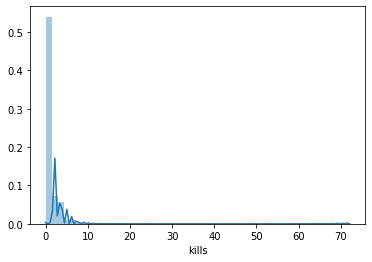

In [46]:
sns.distplot(train['kills'])

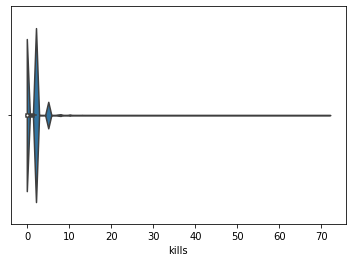

In [47]:
sns.violinplot(train['kills'])

In [48]:
train['kills'].describe()

count    4.446918e+06
mean     9.247933e-01
std      1.558450e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.200000e+01
Name: kills, dtype: float64

In [49]:
train['kills'].quantile(0.9)

3.0

In [50]:
for i in range(0,10):
    a = str(0.9) + str(i)
    print(a, train['kills'].quantile(float(a)))

0.90 3.0
0.91 3.0
0.92 3.0
0.93 3.0
0.94 4.0
0.95 4.0
0.96 4.0
0.97 5.0
0.98 6.0
0.99 7.0


In [51]:
for i in range(0,10):
    a = str(0.99) + str(i)
    print(a, train['kills'].quantile(float(a)))

0.990 7.0
0.991 7.0
0.992 7.0
0.993 8.0
0.994 8.0
0.995 8.0
0.996 9.0
0.997 9.0
0.998 10.0
0.999 12.0


In [67]:
train[(train['kills']>12) & (train['damageDealt']>2000) & (train['walkDistance']<10)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
125753,8f02d08857012d,df5224a39204b0,196a649203b0a3,5,0,2918.0,0,9,22,2,...,0,0.0,0,0.0,0,0,0.0,35,1500,0.875
132050,f156862af94749,83e393b50865fc,2a7474cd8c7625,4,0,2247.0,0,5,0,3,...,0,0.0,0,0.0,0,0,0.0,36,0,0.913


In [61]:
train[(train['kills']>7) & (train['damageDealt']<500) ]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
14236,b3f624b89a0aa1,aeb387619c88ae,7ee14ea92ca672,0,1,411.6,5,4,5,1,...,1,774.6,0,22.57,0,0,491.0,6,1499,0.4828
40520,d1a9f2c5a8c786,a04ae63f68b76e,185dacfad49ae7,0,6,476.7,2,1,7,2,...,1,2032.0,1,0.00,0,1,4068.0,6,1460,1.0000
100317,e58a16f3be772d,8af69822ced954,a7e1ffe2626b12,0,4,472.2,0,0,0,1,...,0,0.0,0,0.00,0,0,2815.0,4,0,0.7340
103060,0f020ea25fcb7b,7c5325c096abac,9253b5a90e5b3c,0,3,457.8,5,1,2,1,...,2,2158.0,0,0.00,0,0,3560.0,6,0,1.0000
110473,8baea1cc0caf28,cb013f961f6b10,6a0c754b148141,1,6,466.9,3,1,3,1,...,0,0.0,0,0.00,0,0,3396.0,7,1530,0.9286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407302,ddf02f400f9b95,2608e613e0ceb7,f8ae2fb06dd9d7,1,11,408.0,3,2,8,1,...,1,0.0,0,0.00,0,0,3343.0,9,0,0.9778
4412053,863ee9a340b1cd,c54c6848ab4c78,b731e10b386d20,0,7,465.0,5,1,2,1,...,2,0.0,0,0.00,0,0,3301.0,3,0,0.9231
4412931,603cfdf3f330d4,5e448d8f4b0ff3,87d5139631e5ae,0,4,423.2,4,2,4,2,...,1,0.0,0,0.00,0,0,2319.0,5,1548,1.0000
4416060,7aca2aadc30ed2,057c1bc7b594ce,60aec82a0d544f,0,2,454.8,4,1,8,1,...,1,3556.0,0,0.00,0,0,2987.0,12,0,0.9615


In [ ]:
train[(train['kills']>7) & (train['damageDealt']<500) ]

In [ ]:
sns.scatterplot(x="kills", y="damageDealt",data=train)

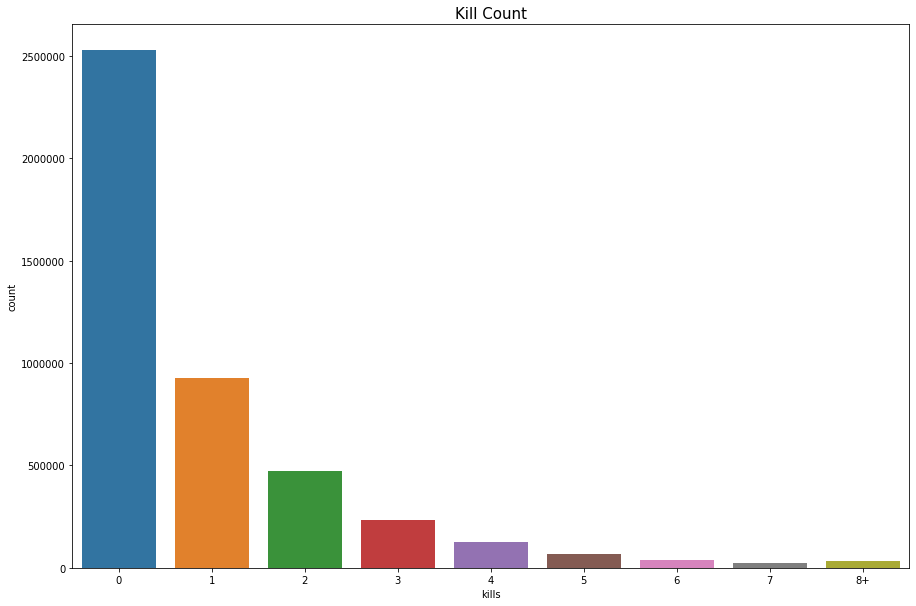

In [64]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

In [136]:

train.drop(['Id','groupId','matchId',],axis=1,inplace=True)

In [137]:

train.drop(['matchType'],axis=1,inplace=True)


In [ ]:
train = numpy.percentile()

In [138]:
y = train['winPlacePerc']
X = train.drop(['winPlacePerc'], axis=1)
#X = train[['damageDealt','kills']]
X.head(1)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.0,0,0,0,60,1241,0,0,...,-1,0,0.0,0,0.0,0,0,244.8,1,1466


In [139]:
y.unique()

array([0.4444, 0.64  , 0.7755, ..., 0.1207, 0.4561, 0.2879])

In [163]:
# train test split

# , stratify=y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)


In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [164]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [165]:
LR =SGDRegressor(learning_rate='constant',penalty=None,max_iter=100)


In [166]:
LR.fit(X_train_norm,y_train)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [167]:
y_pred_sgd=LR.predict(X_test_norm)

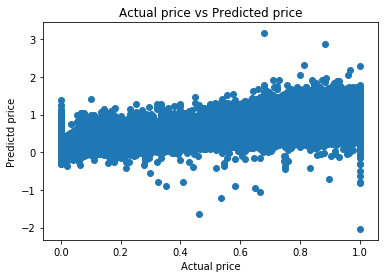

In [169]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [170]:
MSE_lr=mean_squared_error(y_test,y_pred_sgd)
print('mean squared error =',MSE_lr)

mean squared error = 0.016404903042951814


In [168]:
from sklearn.metrics import mean_absolute_error
MAE_lr = mean_absolute_error(y_test, y_pred_sgd)
print(MAE_lr)

0.09397023695050169


In [162]:
train.shape

(4446965, 25)

In [171]:
test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [173]:
abc = test['Id']

In [174]:


test.drop(['Id','groupId','matchId','matchType'],axis=1,inplace=True)


In [175]:
test = scaler.transform(test)

In [176]:
xyz = LR.predict(test)

In [178]:
xyz[:10]

array([0.18045102, 0.8798293 , 0.43389125, 0.49779216, 0.93863236,
       0.00494067, 0.732077  , 0.28290466, 0.51570612, 0.5599122 ])

In [179]:
submission = pd.DataFrame({
        "ID": abc,
        "winPlacePerc": xyz
    })


In [180]:
submission.head()

,ID,winPlacePerc
0,9329eb41e215eb,0.180451
1,639bd0dcd7bda8,0.879829
2,63d5c8ef8dfe91,0.433891
3,cf5b81422591d1,0.497792
4,ee6a295187ba21,0.938632


In [181]:
submission.to_csv("submission.csv",index=False)

In [182]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            object 
 1   winPlacePerc  float64
dtypes: float64(1), object(1)
memory usage: 29.5+ MB
